# Cantera Tools Tutorial

## USER INPUT: File Paths

In [1]:
chemkin_file_path = './chem.inp'
species_dicionary_path = './species_dictionary.txt'

## Next, we load the data from the chemkin files

In [2]:
from rmgpy.chemkin import loadChemkinFile

species_list, reaction_list = loadChemkinFile(chemkin_file_path, species_dicionary_path)

## USER INPUT: Associate Common Names with Smile Strings

In [3]:
from CanteraTools import *
from rmgpy.species import Species

smiles_dictionary = {'PDD':'CCCCCCCCCCCCc1ccccc1',
                     'toluene':'Cc1ccccc1',
                     'ethylbenzene':'CCc1ccccc1', 
                     'propylbenzene':'CCCc1ccccc1',
                     'butylbenzene':'CCCCc1ccccc1', 
                     'pentylbenzene':'CCCCCc1ccccc1',
                     'undecane':'CCCCCCCCCCC',
                     'decane':'CCCCCCCCCC',
                     'ethane':'CC',
                     'methane':'C',
                     'hexane':'CCCCCC',
                     'heptane':'CCCCCCC',
                     'octane':'CCCCCCCC',
                     'nonane':'CCCCCCCCC',
                     'styrene':'C=CC1C=CC=CC=1',
                     'butane': 'CCCC',
                     'pentane': 'CCCCC',
                     'methylcyclopentane': 'CC1CCCC1',
                     'benzene': 'C1=CC=CC=C1',
                     'methyl-cyclohexane': 'CC1CCCCC1',
                     'ethyl-cyclohexane': 'CCC1CCCCC1',
                     '2-methylpropylbenzene': 'CC(C)CC1C=CC=CC=1',
                     'napthalene': 'C1=CC=C2C=CC=CC2=C1',
                     'hexylbenzene': 'CCCCCCC1C=CC=CC=1',
                     'heptylbenzene': 'CCCCCCCC1C=CC=CC=1',
                     'octylbenzene': 'CCCCCCCCC1C=CC=CC=1',
                     'nonylbenzene': 'CCCCCCCCCC1C=CC=CC=1',
                     '1,3-diphenylpropane': 'C1=CC=C(C=C1)CCCC1C=CC=CC=1',
                     'decylbenzene': 'CCCCCCCCCCC1C=CC=CC=1',
                     '1-butyloctylbenzene': 'CCCCCCCC(CCCC)C1C=CC=CC=1',
                     '1-propylnonylbenzene': 'CCCCCCCCC(CCC)C1C=CC=CC=1',
                     '1-ethyldecylbenzene': 'CCCCCCCCCC(CC)C1C=CC=CC=1',
                     'undecylbenzene': 'CCCCCCCCCCCC1C=CC=CC=1',
                     '1-methylundecylbenzene': 'CCCCCCCCCCC(C)C1C=CC=CC=1',
                     '2,3-dimethyldecylbenzene': 'CCCCCCCC(C)C(C)CC1C=CC=CC=1'
                     }

## USER INPUT: Initial Mole Fractions

In [4]:
mol_fracs = {'PDD': 0.254956, 'toluene': 0.232564, 'undecane': 0.51248}

## USER INPUT: Conditions for Cantera Job

In [5]:
all_data = run_cantera_job(smiles_dictionary, 
                           mol_fracs,
                           239, # Time
                           350.0, # Temperature
                           300.0, # Pressure
                           p_units='bar',
                           temp_units='C',
                           time_units='h',
                           chemkin_file=chemkin_file_path,
                           species_dictionary_file=species_dicionary_path,
                           species_list = species_list,
                           reaction_list = reaction_list,
                           )
all_data = change_cantera_data_units(all_data, comp_units='moles_per_mass', time_units='h') # Changes the units in the returned 'all_data' object
%matplotlib notebook

Wrote CTI mechanism file to '/home/mark/Documents/Cantera_Tools/chem.cti'.
Mechanism contains 260 species and 10554 reactions.


## Example Analysis

<IPython.core.display.Javascript object>


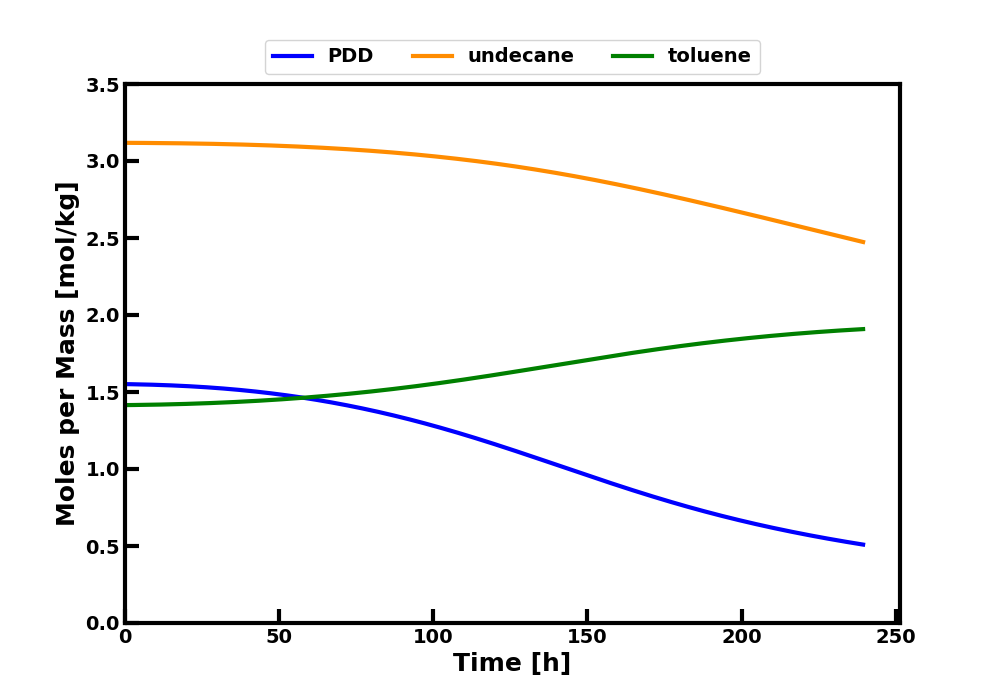

In [6]:
concentration_profile_plot(all_data, ['PDD','toluene','undecane'], logscale=False)

<IPython.core.display.Javascript object>


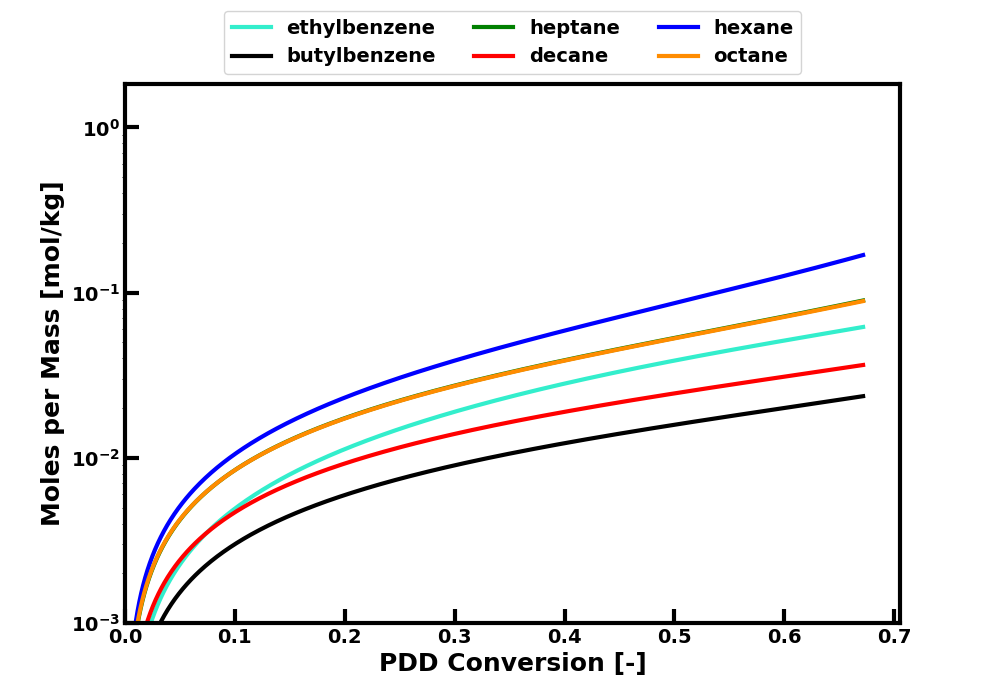

In [7]:
concentration_conversion_plot(all_data, ['hexane','heptane','octane','decane','ethylbenzene', 'butylbenzene'],
                              'PDD',
                              logscale=True,)